In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder as le
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (8,4)

## Exploratory data

In [317]:
dataRaw = pd.read_csv("concrete.csv")
dataRaw.head(15) #several missing values!

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [318]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [319]:
print("Null values")
print(dataRaw.isnull().sum().sort_values(ascending = False))
print()
print("Zero values")
print(dataRaw.isin([0]).sum().sort_values(ascending = False))

Null values
strength        0
age             0
fineagg         0
coarseagg       0
superplastic    0
water           0
ash             0
slag            0
cement          0
dtype: int64

Zero values
ash             566
slag            471
superplastic    379
strength          0
age               0
fineagg           0
coarseagg         0
water             0
cement            0
dtype: int64


In [320]:
dataRaw.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


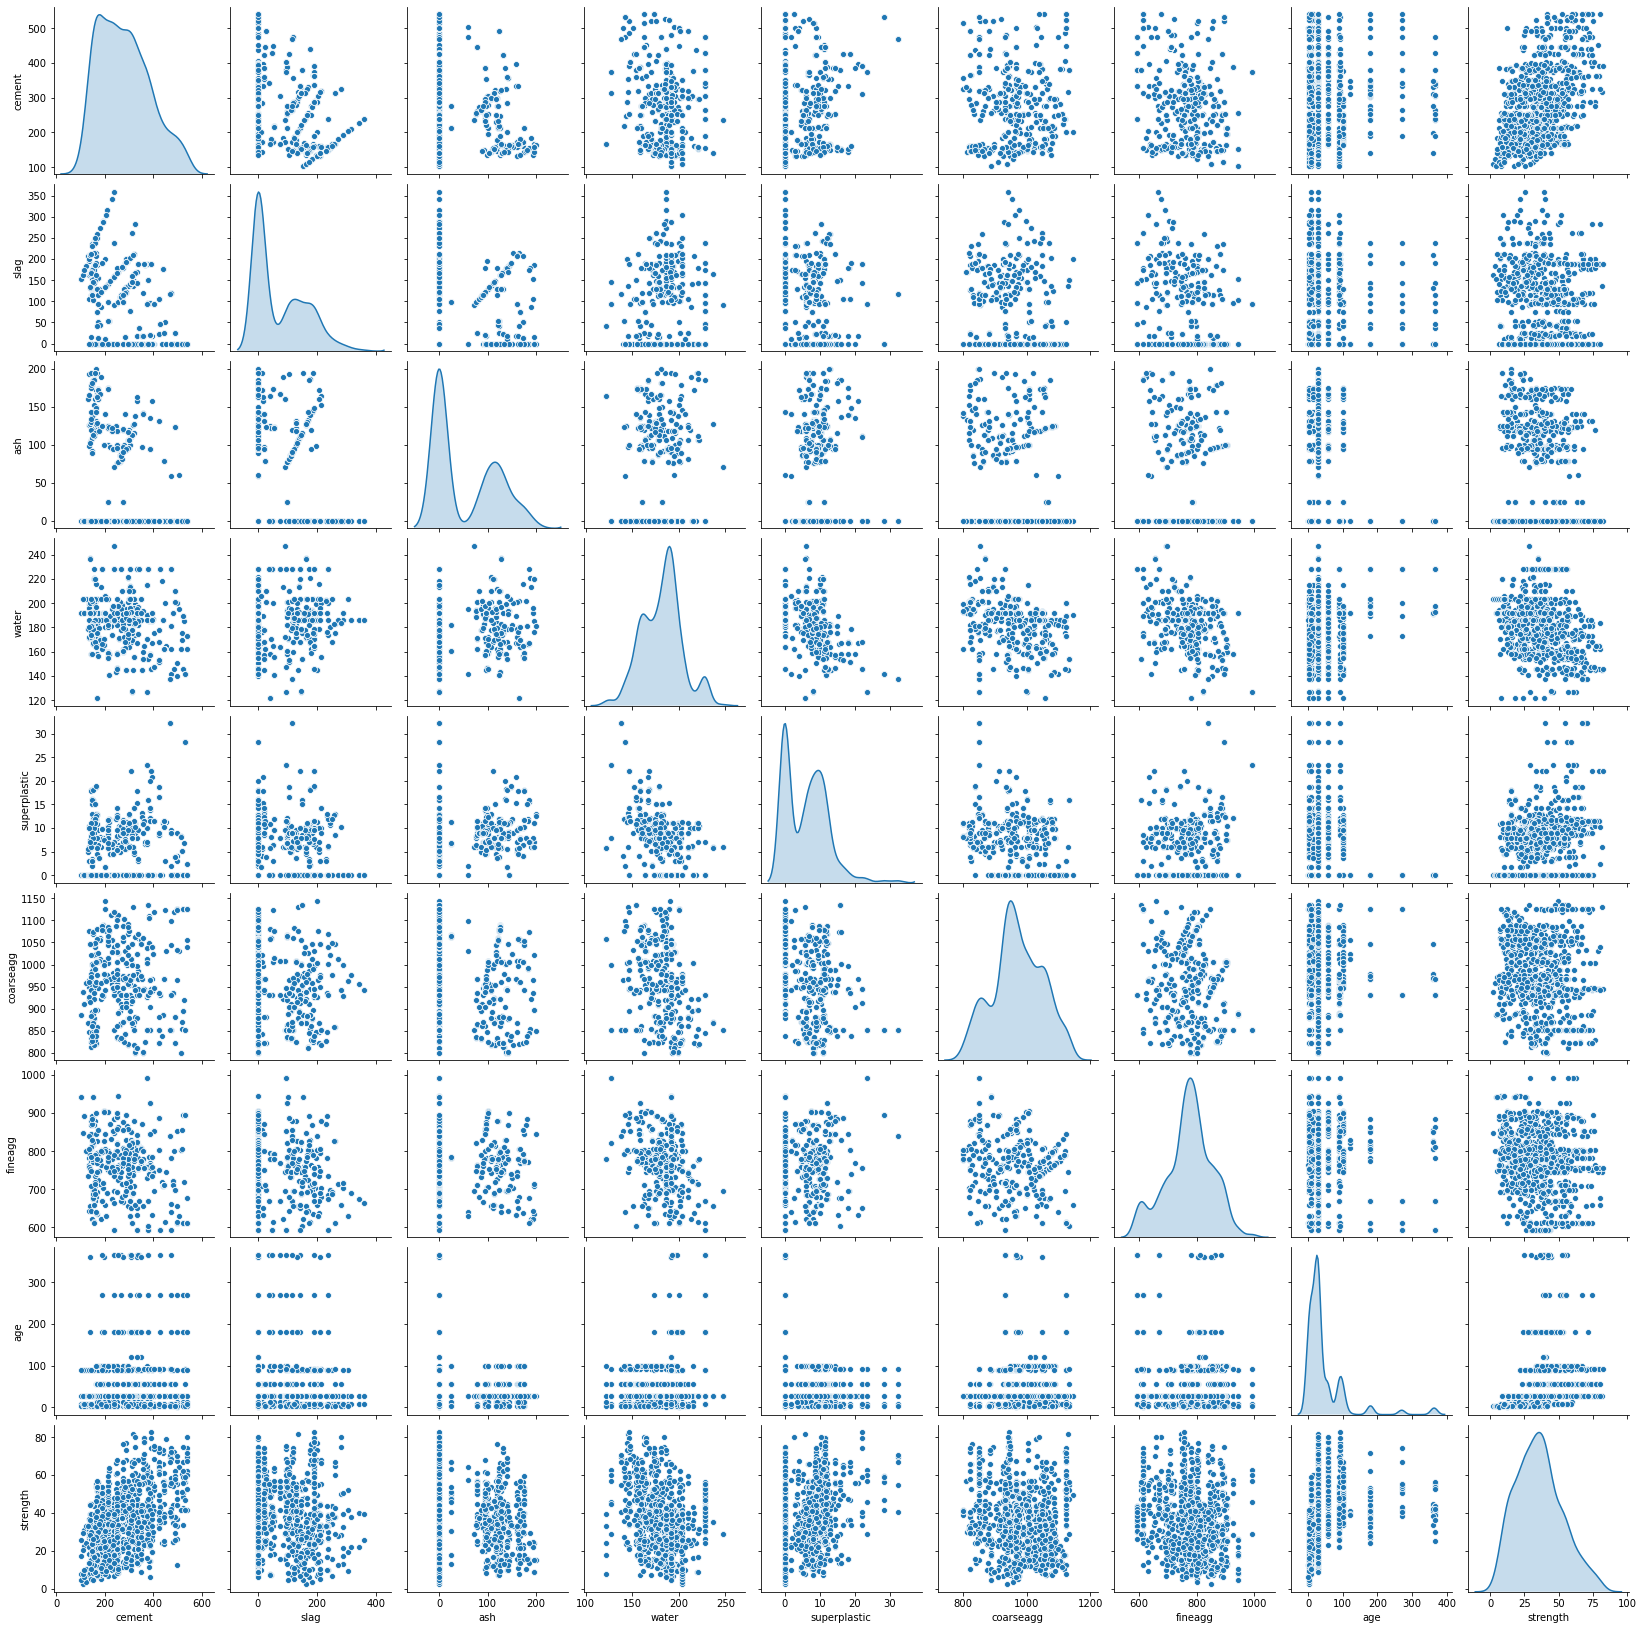

In [321]:
sns.pairplot(dataRaw, diag_kind = 'kde')

In [322]:
dataRaw.replace(0, np.nan, inplace=True)

In [323]:
#Here I'm getting the mean sum of all values to know better how to fill the missing values

#columnsKgM3 = ["cement","slag", "water", "superplastic", "coarseagg", "fineagg"]
#dataRaw["sum"] = dataRaw[columnsKgM3][(dataRaw["ash"].notnull()) & (dataRaw["slag"].notnull()) & (dataRaw["superplastic"].notnull())].sum(axis=1)
#dataRaw['sum'] = dataRaw['sum'].fillna(dataRaw["sum"].mean())

In [396]:
dataCooked = dataRaw.copy()

#dataCooked['ash'] = dataRaw['ash'].fillna(dataRaw['ash'].mean())
dataCooked['ash'] = dataRaw['ash'].fillna(0) 
#dataCooked['slag'] = dataRaw['slag'].fillna(dataRaw['slag'].mean())
dataCooked['slag'] = dataRaw['slag'].fillna(0) 
#dataCooked['superplastic'] = dataRaw['superplastic'].fillna(dataRaw['superplastic'].mean())
dataCooked['superplastic'] = dataRaw['superplastic'].fillna(0)

# I tried something that doesn't work...
# Getting the percentage represantation of each column with missing values

#percentageAsh = (dataRaw['ash'] / dataRaw['sum']).mean()
#percentageSlag = (dataRaw['slag'] / dataRaw['sum']).mean()
#percentageSuperplastic = (dataRaw['superplastic'] / dataRaw['sum']).mean()
#print('ash: ', percentageAsh)
#print('slag: ', percentageSlag)
#print('superplastic: ', percentageSuperplastic)

#Filling the values with the percentage from total

#dataCooked['ash'] = dataRaw['ash'].fillna(dataRaw['ash'] * percentageAsh)
#dataCooked['slag'] = dataRaw['slag'].fillna(dataRaw['sum'] * percentageSlag)
#dataCooked['superplastic'] = dataRaw['superplastic'].fillna(dataRaw['sum'] * percentageSuperplastic)

#dataCooked = dataCooked[dataCooked.columns.drop('sum')]

In [397]:
dataCooked.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


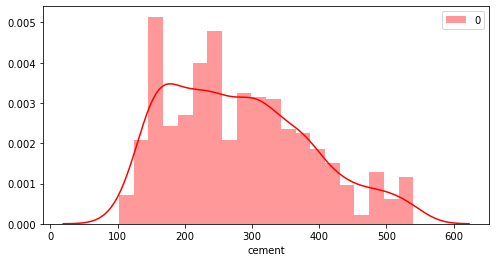

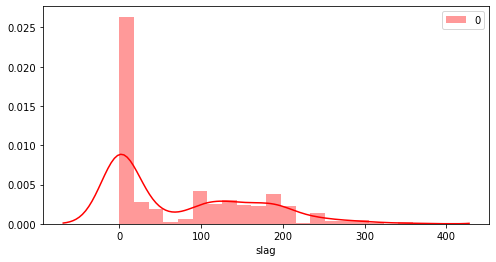

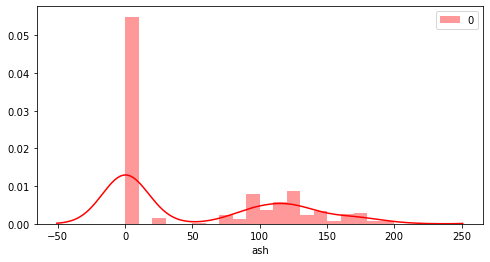

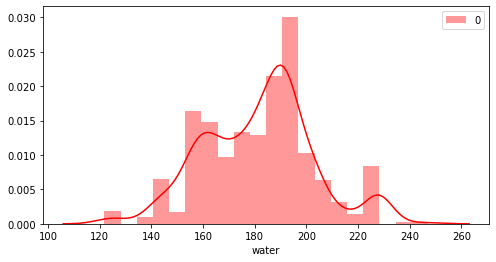

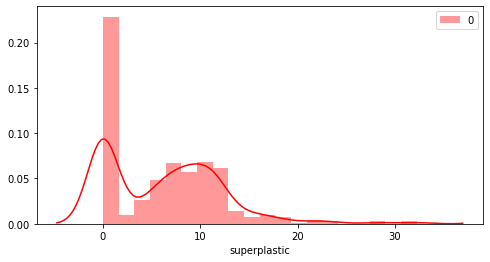

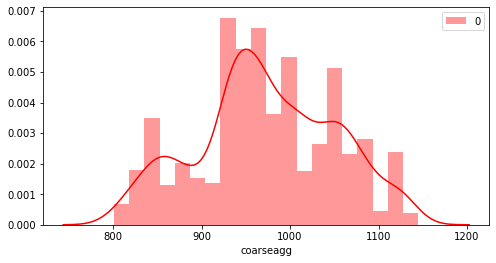

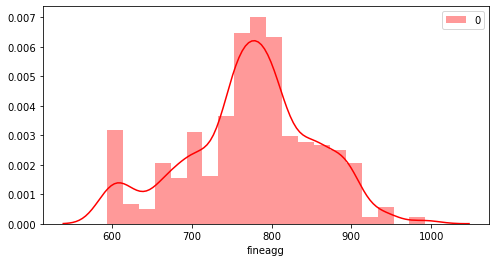

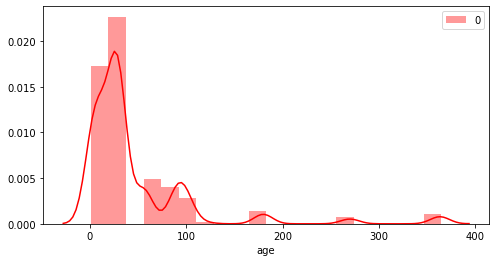

In [398]:
#This is just to visualize the variables distributions
for column in dataCooked.columns.drop('strength'):
    sns.distplot(dataCooked[column],color='r',label=0, bins=20)
    plt.legend()
    plt.show()

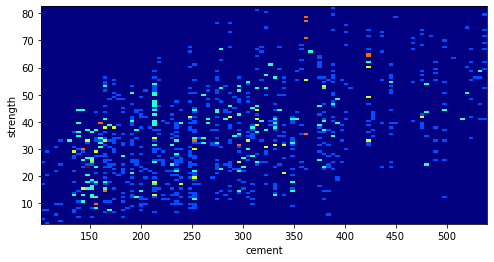

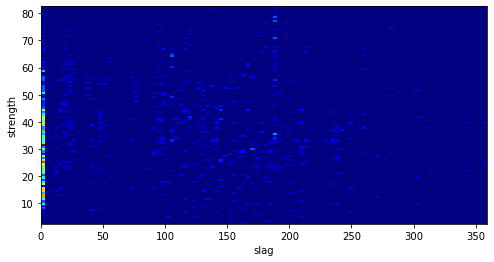

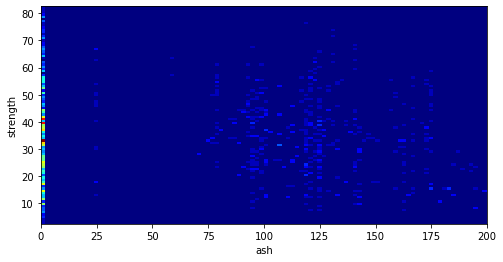

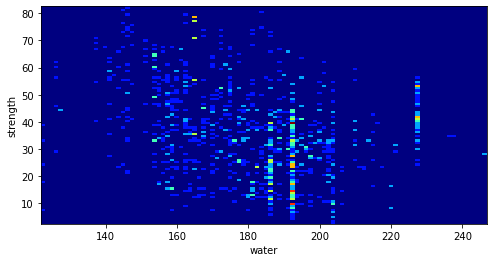

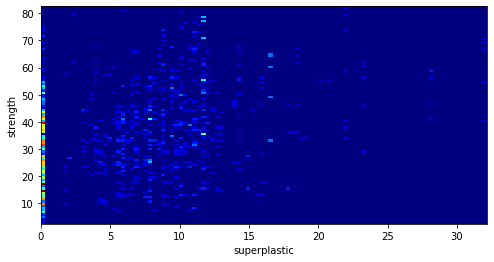

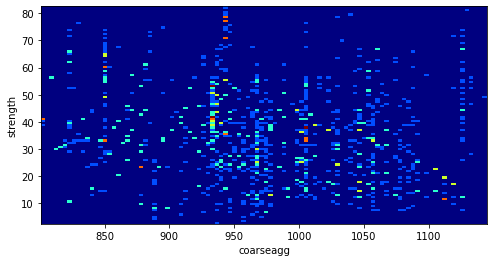

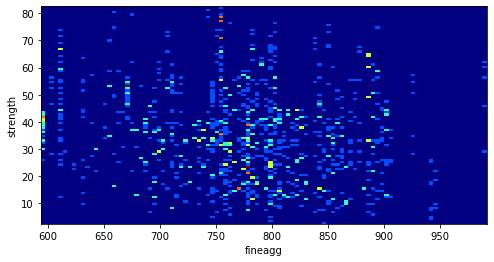

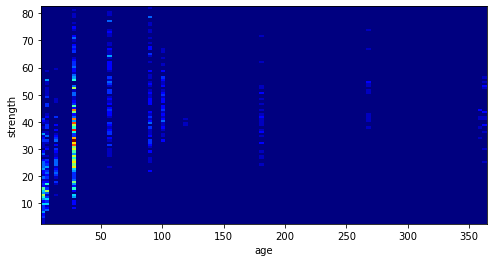

In [399]:
import pylab as plab

#This is just to visualize the variables distributions
for column in dataCooked.columns.drop('strength'):
    x = dataCooked[column]
    y = dataCooked['strength']
    plt.hist2d(x, y, bins=(100, 100), cmap=plt.cm.jet)
    plt.xlabel(column)
    plt.ylabel('strength')
    plt.show()   
    

## Preparing the models

In [400]:
modelBase = dataCooked.copy()

X = modelBase.drop('strength' , axis=1)
y = modelBase.pop('strength')

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)

## Linear Regression

In [402]:
from sklearn.linear_model import LinearRegression
pipeLR = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('lin', LinearRegression())])

paramLR_grid = {
 'pca__n_components':[5,7],
 'lin__fit_intercept': [False, True],
 'lin__normalize':[False, True],
 'lin__copy_X':[False, True],
 'lin__n_jobs':[-1, 0, 1]}

randomLR = RandomizedSearchCV( pipeLR , param_distributions = paramLR_grid, n_iter = 10, scoring='r2')

randomLR.fit( X_train, y_train)

print(" Best cross-validation R2: {:.2f}". format(randomLR.best_score_)) 
print(" Best parameters: ", randomLR.best_params_) 
print(" Test set R2: {:.2f}". format( randomLR.score( X_test, y_test)))

 Best cross-validation R2: 0.60
 Best parameters:  {'pca__n_components': 7, 'lin__normalize': True, 'lin__n_jobs': -1, 'lin__fit_intercept': True, 'lin__copy_X': False}
 Test set R2: 0.56


## Decision Tree model testing

In [403]:
from sklearn.tree import DecisionTreeRegressor
pipeTR = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('tre', DecisionTreeRegressor())])

paramTR_grid = {
 'pca__n_components':[5,7],
 'tre__random_state': [1,2,3,4,5,6,7],
 'tre__criterion' : ['mse', 'friedman_mse', 'mae']}

randomTR = RandomizedSearchCV( pipeTR , param_distributions = paramTR_grid, n_iter = 10, scoring='r2')

randomTR.fit( X_train, y_train)

print(" Best cross-validation R2: {:.2f}". format(randomTR.best_score_)) 
print(" Best parameters: ", randomTR.best_params_) 
print(" Test set R2: {:.2f}". format( randomTR.score( X_test, y_test)))

 Best cross-validation R2: 0.64
 Best parameters:  {'tre__random_state': 6, 'tre__criterion': 'friedman_mse', 'pca__n_components': 7}
 Test set R2: 0.67


## Boosting Decision Tree

In [404]:
from sklearn.ensemble import AdaBoostRegressor
pipeBTR = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('tre', AdaBoostRegressor())])

paramBTR_grid = {
 'pca__n_components':[5,7],
 'tre__n_estimators':[5,7],
 'tre__random_state': [1,2,3,4,5,6,7],
 'tre__loss' : ['linear', 'square', 'exponential']}

randomBTR = RandomizedSearchCV( pipeBTR , param_distributions = paramBTR_grid, n_iter = 10, scoring='r2')

randomBTR.fit( X_train, y_train)

print(" Best cross-validation R2: {:.2f}". format(randomBTR.best_score_)) 
print(" Best parameters: ", randomBTR.best_params_) 
print(" Test set R2: {:.2f}". format( randomBTR.score( X_test, y_test)))

 Best cross-validation R2: 0.57
 Best parameters:  {'tre__random_state': 4, 'tre__n_estimators': 7, 'tre__loss': 'square', 'pca__n_components': 7}
 Test set R2: 0.60


## Upsampling

In [405]:
from imblearn.over_sampling import RandomOverSampler

sm = RandomOverSampler()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

ValueError: Unknown label type: 'continuous'

In [406]:
# I tried to use Upsampling but it didn't work at all, now I'm out of time, it's my fault, I forgot the timeline.

In [ ]:
#Thanks in advance for any hint of why the score doesn't go up.